In [42]:
import pandas as pd
import json
from google.colab import data_table

pd.options.display.max_columns = 20 # Define o limite máximo de colunas a serem exibidas
pd.options.display.width = None # Define a largura da saída como não especificada, permitindo que as colunas sejam divididas

# load data using Python JSON module - faça upload do arquivo antes
with open('/receita - 1 a 12 - 2022.json', 'r', encoding='utf-8') as f:
    json_data = json.load(f)

# Normaliza o JSON e cria o DataFrame
df = pd.json_normalize(json_data, 'registros', meta=['informacao', 'totalRegistros'])

In [43]:
# Normaliza a coluna "registros" novamente, mas desta vez com "record_path" contendo "listFonteRecursos"
df_listFonteRecursos = pd.json_normalize(json_data, record_path=['registros', 'registro', 'listFonteRecursos'], meta=['informacao', 'totalRegistros'])

# Seleciona apenas as colunas relevantes
df_listFonteRecursos = df_listFonteRecursos[['codigo', 'denominacao', 'percentual']]

# Renomeia as colunas para não perder o nome completo quando normalizado
df_listFonteRecursos.rename(columns={
    'codigo': 'registro.listFonteRecursos.codigo',
    'denominacao': 'registro.listFonteRecursos.denominacao',
    'percentual': 'registro.listFonteRecursos.percentual',
}, inplace=True)

# Exibe o DataFrame resultante
table = data_table.DataTable(df_listFonteRecursos.iloc[:3],include_index=False)
display(table)


,registro.listFonteRecursos.codigo,registro.listFonteRecursos.denominacao,registro.listFonteRecursos.percentual
0,15000000,Recursos não vinculados de Impostos,100.0
1,15000000,Recursos não vinculados de Impostos,100.0
2,15000000,Recursos não vinculados de Impostos,100.0


In [44]:
# Normaliza a coluna "registros" novamente, mas desta vez com "record_path" contendo "listMovimentos"
df_listMovimentos = pd.json_normalize(json_data, record_path=['registros', 'registro', 'listMovimentos'], meta=['informacao', 'totalRegistros'])

# Seleciona apenas as colunas relevantes
df_listMovimentos = df_listMovimentos[['dataMovimento', 'tipoMovimento', 'valorMovimento']]

# Renomeia as colunas para não perder o nome completo quando normalizado
df_listMovimentos.rename(columns={
    'dataMovimento': 'registro.listMovimentos.dataMovimento',
    'tipoMovimento': 'registro.listMovimentos.tipoMovimento',
    'valorMovimento': 'registro.listMovimentos.valorMovimento',
}, inplace=True)


# Exibe o DataFrame resultante
table = data_table.DataTable(df_listMovimentos.iloc[:3],include_index=False)
display(table)


,registro.listMovimentos.dataMovimento,registro.listMovimentos.tipoMovimento,registro.listMovimentos.valorMovimento
0,2022-01-01,Previsão de Receita,34000.0
1,2022-01-01,Previsão de Receita,160000.0
2,2022-01-01,Previsão de Receita,10000.0


In [45]:
# Concatena os DataFrames df e df_listFonteRecursos
df = pd.concat([df.drop('registro.listFonteRecursos', axis=1), df_listFonteRecursos], axis=1)
df = pd.concat([df.drop('registro.listMovimentos', axis=1), df_listMovimentos], axis=1)



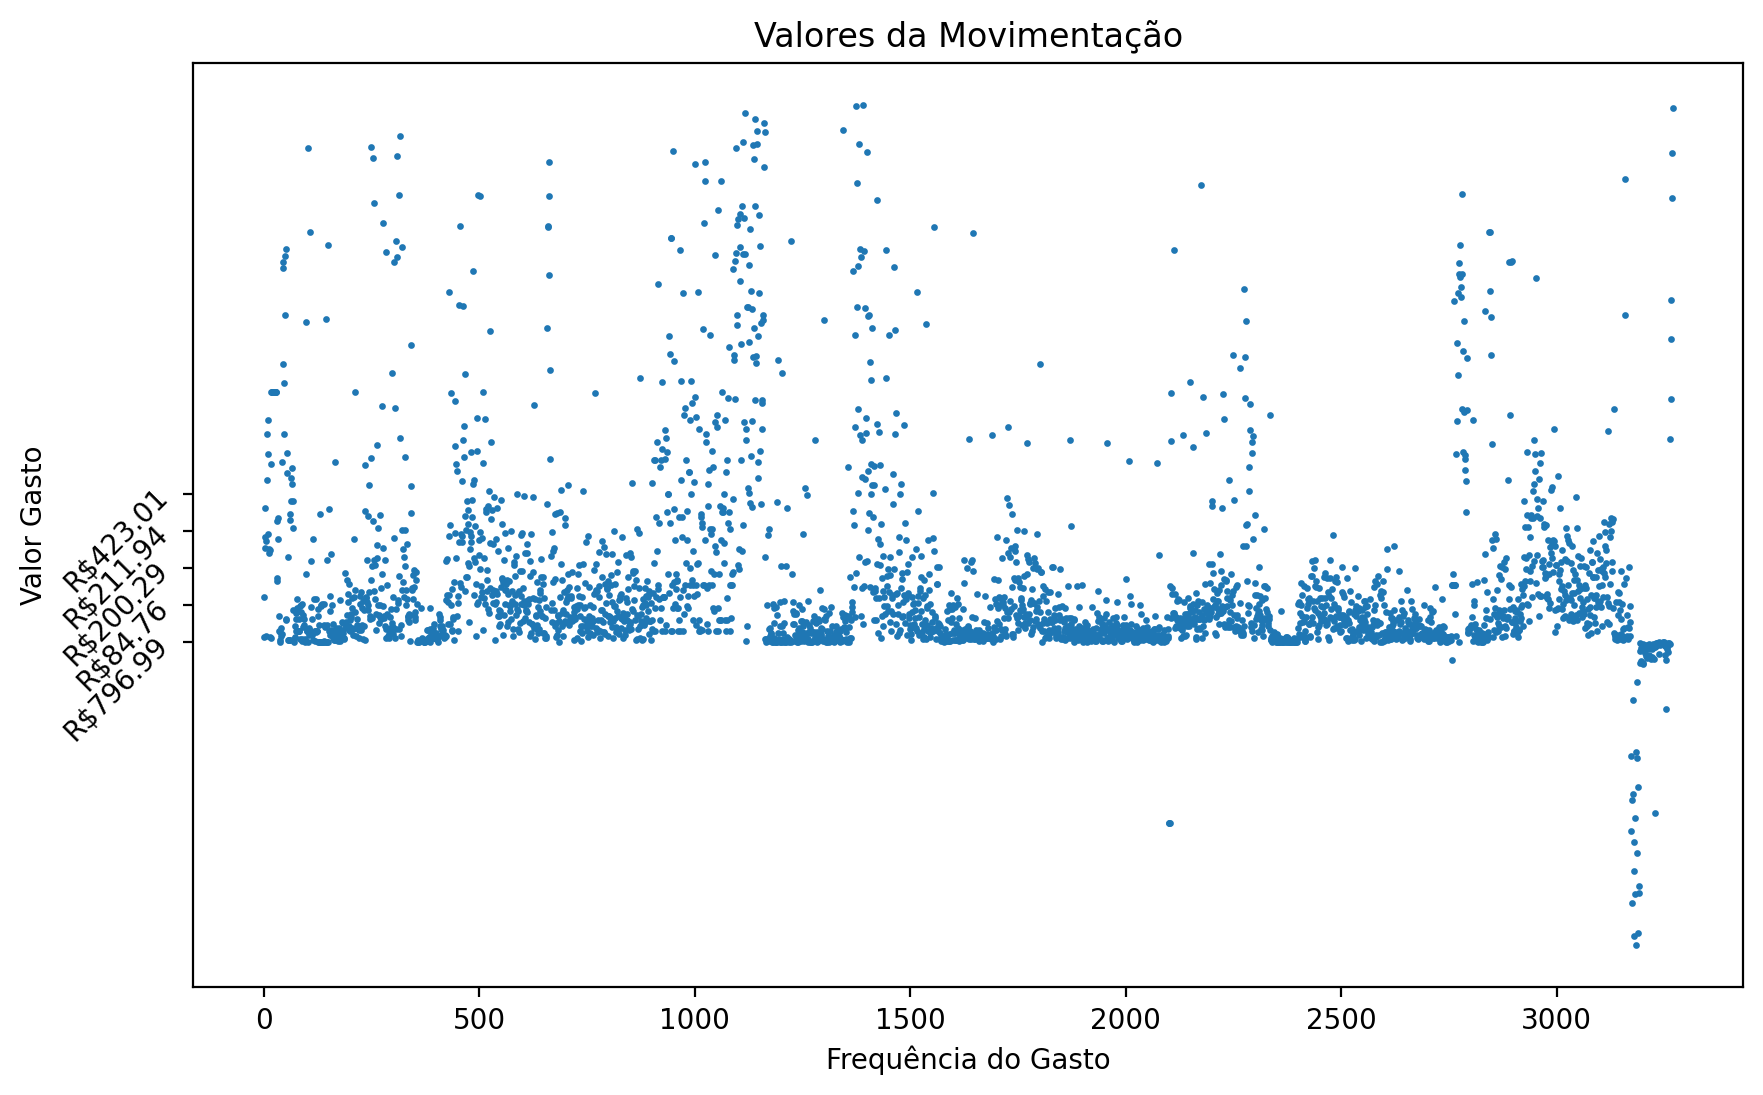

In [46]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Obtém a coluna de valores
valores = df['registro.listMovimentos.valorMovimento']

# Define a resolução do gráfico
plt.figure(figsize=(10,6), dpi=200)

# Remove outliers
q1 = valores.quantile(0.25)
q3 = valores.quantile(0.75)
iqr = q3 - q1
lim_inf = q1 - 1.5 * iqr
lim_sup = q3 + 1.5 * iqr
valores = valores[(valores >= lim_inf) & (valores <= lim_sup)]

# Plota o gráfico de dispersão
plt.scatter(x=range(len(valores)), y=valores, s=2)

# Configura a formatação dos valores do eixo x
k = len(valores) // 5  # select every k-th value
plt.yticks(range(0, len(valores), k), [f'R${x:.2f}' for x in valores[::k]], rotation=45)

# Configura o título e os rótulos dos eixos
plt.title('Valores da Movimentação')
plt.xlabel('Frequência do Gasto')
plt.ylabel('Valor Gasto')


# Mostra o gráfico
plt.show()

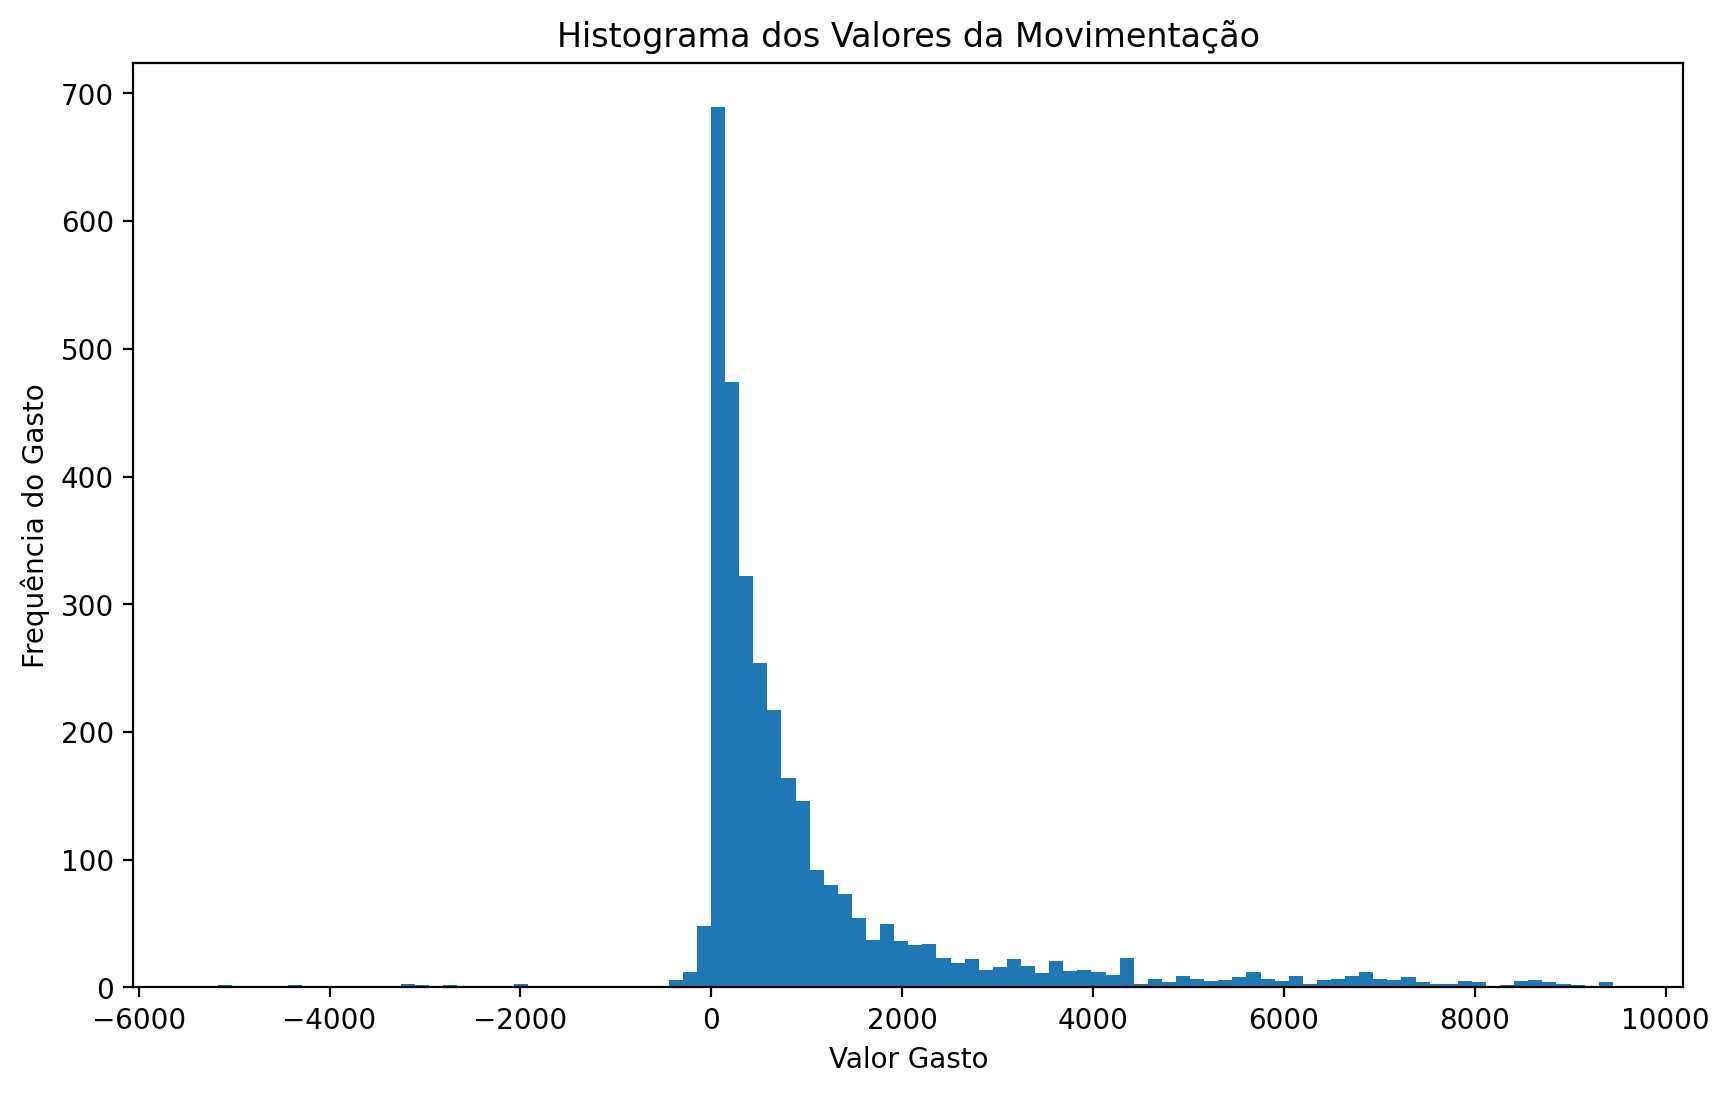

In [47]:
#grafico de barras
import matplotlib.pyplot as plt

# Get the column of values
valores = df['registro.listMovimentos.valorMovimento']

# Define the resolution of the plot
plt.figure(figsize=(10, 6), dpi=200)

# Remove outliers
q1 = valores.quantile(0.25)
q3 = valores.quantile(0.75)
iqr = q3 - q1
lim_inf = q1 - 1.5 * iqr
lim_sup = q3 + 1.5 * iqr
valores = valores[(valores >= lim_inf) & (valores <= lim_sup)]

# Create a histogram of the values
plt.hist(valores, bins=100)

# Set the x-axis and y-axis labels and the plot title
plt.xlabel('Valor Gasto')
plt.ylabel('Frequência do Gasto')
plt.title('Histograma dos Valores da Movimentação')

# Show the plot
plt.show()

In [48]:
valores = df['registro.listMovimentos.valorMovimento']

valores.describe()

count    4.206000e+03
mean     7.904709e+04
std      1.065704e+06
min     -8.400000e+06
25%      1.923500e+02
50%      6.751450e+02
75%      3.899480e+03
max      4.200000e+07
Name: registro.listMovimentos.valorMovimento, dtype: float64

In [49]:
# Renomeia as colunas para facilitar a identificação
df.rename(columns={
    'registro.listFonteRecursos.codigo'       : 'Fonte de Recurso - Código',
    'registro.listFonteRecursos.denominacao'  : 'Fonte de Recurso - Denominação',
    'registro.listFonteRecursos.percentual'   : 'Fonte de Recurso - Percentual',
    'registro.listMovimentos.dataMovimento'   : 'Movimentação - Data',
    'registro.listMovimentos.tipoMovimento'   : 'Movimentação - Tipo',
    'registro.listMovimentos.valorMovimento'  : 'Movimentação - Valor',
}, inplace=True)

# Seleciona apenas os primeiros registros
df = df.iloc[:50]

# Formatando a saída:
data_table.enable_dataframe_formatter()

# Divide as colunas em grupos de 10 e exibe cada grupo
for i in range(0, len(df.columns), 10):
    table = data_table.DataTable(df.iloc[:, i:i+10], include_index=False, num_rows_per_page=10)
    display(table)

,registro.receita.codigo,registro.receita.tipoReceita,registro.unidadeGestora.codigo,registro.unidadeGestora.denominacao,registro.naturezaReceita.categoriaEconomica.codigo,registro.naturezaReceita.categoriaEconomica.denominacao,registro.naturezaReceita.origem.codigo,registro.naturezaReceita.origem.denominacao,registro.naturezaReceita.especie.codigo,registro.naturezaReceita.especie.denominacao
0,477.0,Bruta,2.0,Prefeitura Municipal de Assú,100000000000,Receitas Correntes,190000000000,Outras Receitas Correntes,192000000000,"Indenizações, Restituições e Ressarcimentos"
1,478.0,Bruta,2.0,Prefeitura Municipal de Assú,100000000000,Receitas Correntes,190000000000,Outras Receitas Correntes,199000000000,Demais Receitas Correntes
2,479.0,Bruta,2.0,Prefeitura Municipal de Assú,200000000000,Receitas de Capital,220000000000,Alienação de Bens,221000000000,Alienação de Bens Móveis
3,480.0,Bruta,2.0,Prefeitura Municipal de Assú,200000000000,Receitas de Capital,240000000000,Transferências de Capital,241000000000,Transferências da União e de suas Entidades
4,481.0,Bruta,2.0,Prefeitura Municipal de Assú,200000000000,Receitas de Capital,240000000000,Transferências de Capital,241000000000,Transferências da União e de suas Entidades
5,482.0,Bruta,2.0,Prefeitura Municipal de Assú,100000000000,Receitas Correntes,130000000000,Receita Patrimonial,132000000000,Valores Mobiliários
6,483.0,Bruta,2.0,Prefeitura Municipal de Assú,100000000000,Receitas Correntes,130000000000,Receita Patrimonial,132000000000,Valores Mobiliários
7,484.0,Bruta,2.0,Prefeitura Municipal de Assú,100000000000,Receitas Correntes,130000000000,Receita Patrimonial,132000000000,Valores Mobiliários
8,517.0,Bruta,2.0,Prefeitura Municipal de Assú,100000000000,Receitas Correntes,170000000000,Transferências Correntes,171000000000,Transferências da União e de suas Entidades
9,485.0,Bruta,2.0,Prefeitura Municipal de Assú,100000000000,Receitas Correntes,130000000000,Receita Patrimonial,132000000000,Valores Mobiliários


,registro.naturezaReceita.rubrica.codigo,registro.naturezaReceita.rubrica.denominacao,registro.naturezaReceita.alinea.codigo,registro.naturezaReceita.alinea.denominacao,registro.naturezaReceita.subalinea.codigo,registro.naturezaReceita.subalinea.denominacao,registro.naturezaReceita.subdetalhamento1.codigo,registro.naturezaReceita.subdetalhamento1.denominacao,registro.naturezaReceita.subdetalhamento2.codigo,registro.naturezaReceita.subdetalhamento2.denominacao
0,192200000000,Restituições,192299000000,Outras Restituições,192299100000,Outras Restituições,192299120000,Outras Restituições - Multas e Juros,192299120000,Outras Restituições - Multas e Juros
1,199900000000,Outras Receitas Correntes,199999000000,Outras Receitas,199999300000,Outras Receitas Não Arrecadadas e Não Projetad...,199999310000,Outras Receitas Não Arrecadadas e Não Projetad...,199999310000,Outras Receitas Não Arrecadadas e Não Projetad...
2,221300000000,Alienação de Bens Móveis e Semoventes,221301000000,Alienação de Bens Móveis e Semoventes,221301000000,Alienação de Bens Móveis e Semoventes,221301010000,Alienação de Bens Móveis e Semoventes,221301010000,Alienação de Bens Móveis e Semoventes
3,241200000000,Transferências de Recursos do Fundo Nacional d...,241250000000,Transferências de Recursos Destinados a Progra...,241250900000,Outras transferências destinadas a Programas d...,241250910000,Outras transferências destinadas a Programas d...,241250910000,Outras transferências destinadas a Programas d...
4,241400000000,Transferências de Convênios da União e de suas...,241499000000,Outras Transferências de Convênios da União e ...,241499000000,Outras Transferências de Convênios da União e ...,241499010000,Outras Transferencias de Convênios da União e ...,241499010000,Outras Transferencias de Convênios da União e ...
5,132900000000,Outros Valores Mobiliários,132999000000,Outros Valores Mobiliários,132999100000,Outros Valores Mobiliários,132999110000,Outros Valores Mobiliários - PRINCIPAL,132999110000,Outros Valores Mobiliários - PRINCIPAL
6,132100000000,Juros e Correções Monetárias,132101000000,Remuneração de Depósitos Bancários,132101000000,Remuneração de Depósitos Bancários,132101060000,Remuneração de Depósitos Bancários - Rec. Roya...,132101060000,Remuneração de Depósitos Bancários - Rec. Roya...
7,132100000000,Juros e Correções Monetárias,132101000000,Remuneração de Depósitos Bancários,132101000000,Remuneração de Depósitos Bancários,132101040000,Remuneração de Depósitos Bancários - Rec. Dive...,132101040000,Remuneração de Depósitos Bancários - Rec. Dive...
8,171500000000,Transferências de Recursos de Complementação d...,171551000000,Transferências de Recursos de Complementação d...,171551000000,Transferências de Recursos de Complementação d...,171551010000,Transferências de Recursos de Complementação d...,171551010000,Transferências de Recursos de Complementação d...
9,132100000000,Juros e Correções Monetárias,132101000000,Remuneração de Depósitos Bancários,132101000000,Remuneração de Depósitos Bancários,132101050000,Remuneração de Depósitos Bancários - Rec. Conv...,132101050000,Remuneração de Depósitos Bancários - Rec. Conv...


,registro.naturezaReceita.subdetalhamento3.codigo,registro.naturezaReceita.subdetalhamento3.denominacao,registro.exercicio.exercicio,informacao,totalRegistros,Fonte de Recurso - Código,Fonte de Recurso - Denominação,Fonte de Recurso - Percentual,Movimentação - Data,Movimentação - Tipo
0,192299120000,Outras Restituições - Multas e Juros,2022.0,Receita,101,15000000.0,Recursos não vinculados de Impostos,100.00,2022-01-01,Previsão de Receita
1,199999310000,Outras Receitas Não Arrecadadas e Não Projetad...,2022.0,Receita,101,15000000.0,Recursos não vinculados de Impostos,100.00,2022-01-01,Previsão de Receita
2,221301010000,Alienação de Bens Móveis e Semoventes,2022.0,Receita,101,15000000.0,Recursos não vinculados de Impostos,100.00,2022-01-01,Previsão de Receita
3,241250910000,Outras transferências destinadas a Programas d...,2022.0,Receita,101,15700000.0,Transferências do Governo Federal referente a ...,100.00,2022-01-01,Previsão de Receita
4,241499010000,Outras Transferencias de Convênios da União e ...,2022.0,Receita,101,17000000.0,Outras Transferências de Convênios ou Instrume...,100.00,2022-11-28,Arrecadação de receita
5,132999110000,Outros Valores Mobiliários - PRINCIPAL,2022.0,Receita,101,15000000.0,Recursos não vinculados de Impostos,100.00,2022-01-01,Previsão de Receita
6,132101060000,Remuneração de Depósitos Bancários - Rec. Roya...,2022.0,Receita,101,17040000.0,Transferências da União Referentes a Compensaç...,100.00,2022-02-17,Arrecadação de receita
7,132101040000,Remuneração de Depósitos Bancários - Rec. Dive...,2022.0,Receita,101,16200000.0,Contribuição para o Custeio do Serviço de Ilum...,10.00,2022-02-01,Arrecadação de receita
8,171551010000,Transferências de Recursos de Complementação d...,2022.0,Receita,101,15000000.0,Recursos não vinculados de Impostos,90.00,2022-06-21,Arrecadação de receita
9,132101050000,Remuneração de Depósitos Bancários - Rec. Conv...,2022.0,Receita,101,15410000.0,Transferências do FUNDEB - Complementação da U...,100.00,2022-01-01,Previsão de Receita


,Movimentação - Valor
0,34000.00
1,160000.00
2,10000.00
3,650000.00
4,226096.90
5,1832000.00
6,419403.01
7,230435.71
8,796.99
9,100.00
